# 2019 rainfall

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.size'] = 24
#mpl.rc('xtick', labelsize=20) 
#mpl.rc('ytick', labelsize=20) 

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
RV_gauge = pd.read_csv('JerrysMHRain-2019-02-27.csv')
RV_gauge.head()

,datetime,RainFall,cumulativeRain,datetime.1,PreEvent_CumSum_mm,Unnamed: 5
0,10/1/2018 0:00,0.0,0.0,10/1/2018 0:00,NaN,NaN
1,10/1/2018 0:15,0.0,0.0,10/1/2018 0:15,NaN,NaN
2,10/1/2018 0:30,0.0,0.0,10/1/2018 0:30,NaN,NaN
3,10/1/2018 0:45,0.0,0.0,10/1/2018 0:45,NaN,NaN
4,10/1/2018 1:00,0.0,0.0,10/1/2018 1:00,NaN,NaN


In [3]:
RV_gauge['datetime'] =  pd.to_datetime(RV_gauge['datetime'])
RV_gauge.head()
RV_gauge.dtypes

datetime              datetime64[ns]
RainFall                     float64
cumulativeRain               float64
datetime.1                    object
PreEvent_CumSum_mm           float64
Unnamed: 5                   float64
dtype: object

In [4]:
RV_gauge = RV_gauge.drop(['datetime.1'], axis=1)
RV_gauge.tail()

,datetime,RainFall,cumulativeRain,PreEvent_CumSum_mm,Unnamed: 5
14336,2019-02-27 08:00:00,0.000,506.476,NaN,NaN
14337,2019-02-27 08:15:00,0.000,506.476,NaN,NaN
14338,2019-02-27 08:30:00,0.254,506.730,NaN,NaN
14339,2019-02-27 08:45:00,0.000,506.730,NaN,NaN
14340,2019-02-27 09:00:00,0.254,506.984,NaN,NaN


In [5]:
RV_gauge = RV_gauge.set_index('datetime')

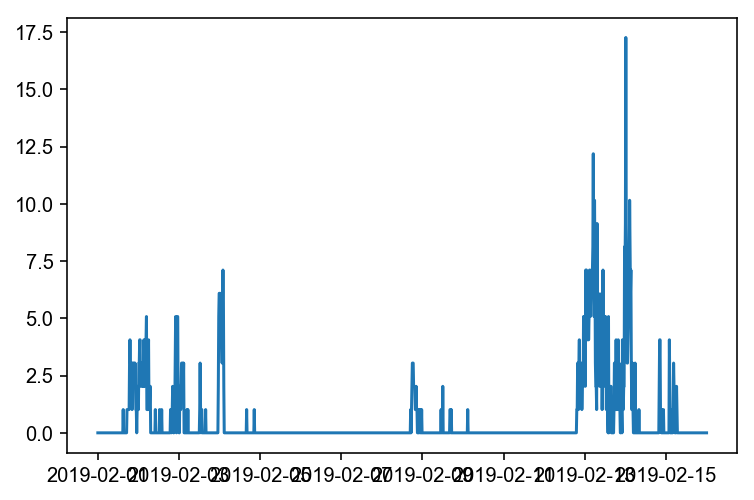

In [6]:
fig, axS = plt.subplots()

slope = RV_gauge['RainFall'] / 0.25 # mm/hr slope
axS.plot(slope.loc['2019-02-01 00:00:00':'2019-02-16 00:00:00'])


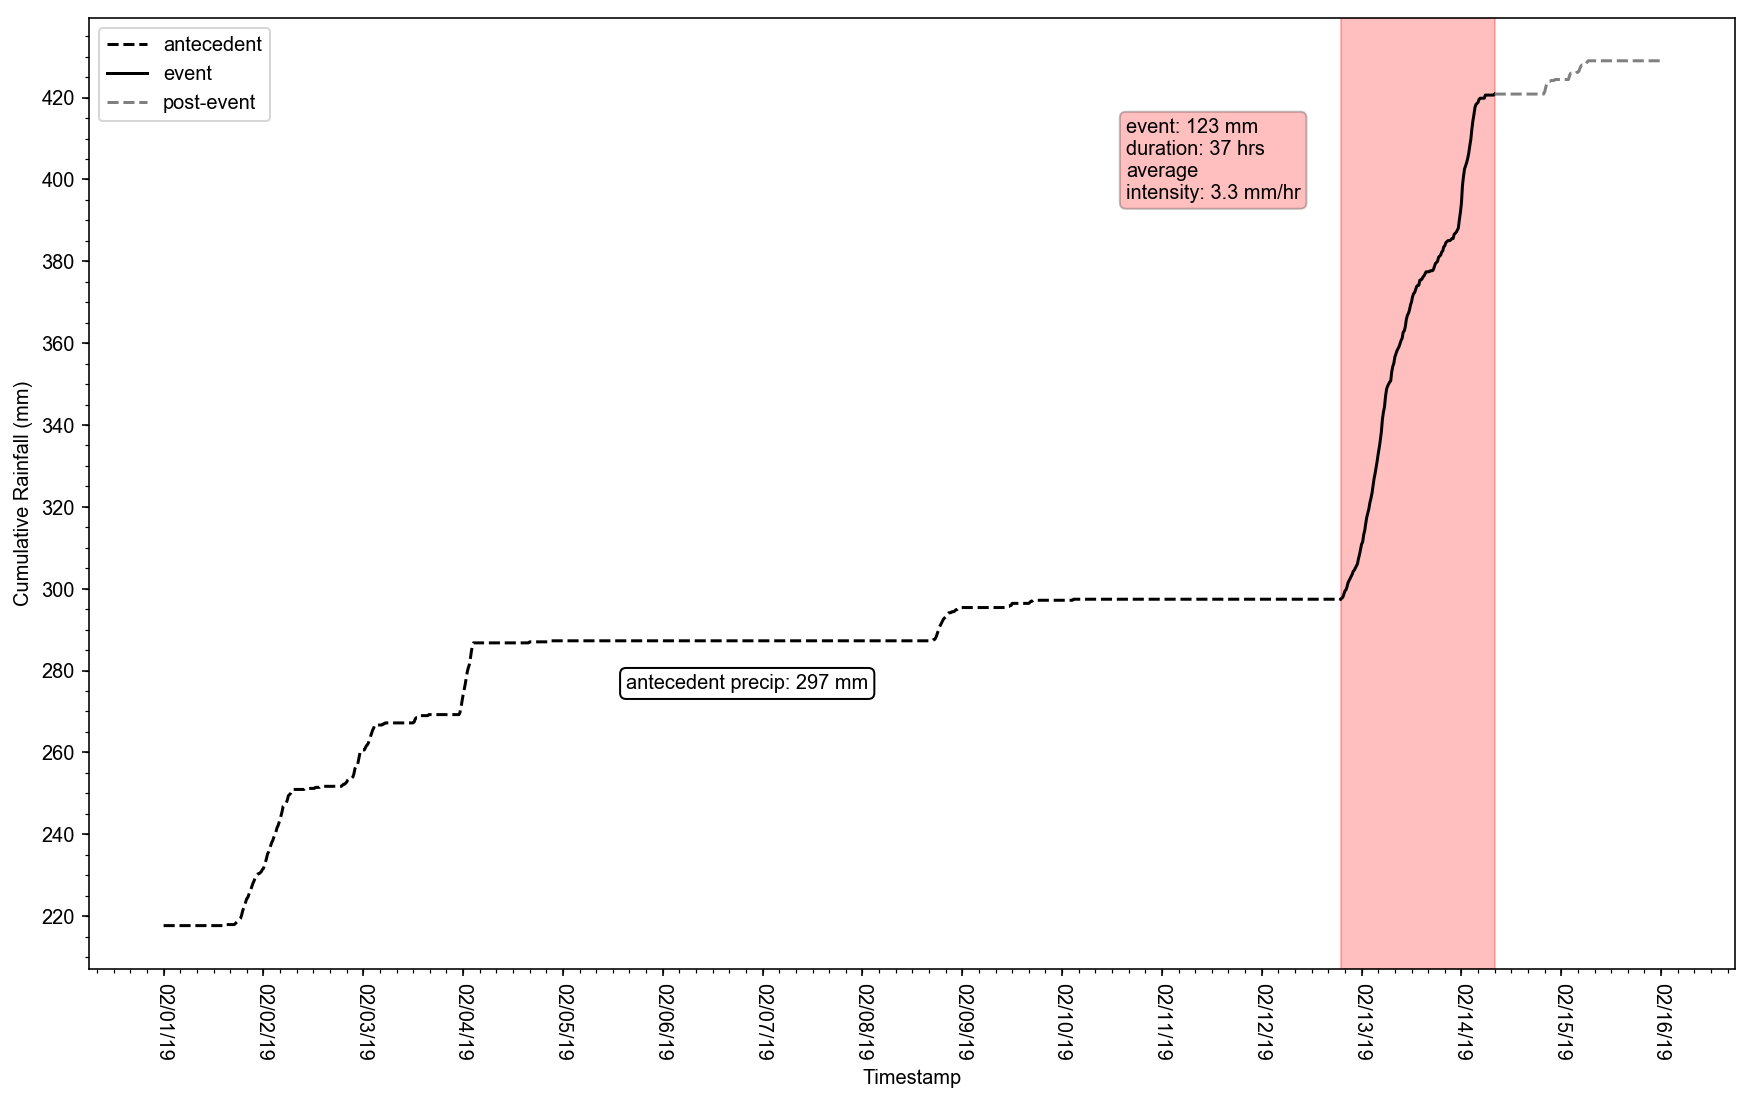

In [7]:
import matplotlib.dates as mdates

days = mdates.DayLocator()   # every year
hours_4 = mdates.HourLocator(byhour=[0,4,8,12,16,20], interval = 1)  # every 4 hours
days_fmt = mdates.DateFormatter('%D')


fig, ax = plt.subplots()
ax.plot(RV_gauge.loc['2019-02-01 00:00:00':'2019-02-12 19:00:00', 'cumulativeRain'], linestyle='--', color='black', label = 'antecedent')
ax.plot(RV_gauge.loc['2019-02-12 19:00:00':'2019-02-14 08:00:00', 'cumulativeRain'], color='black', label = 'event')
ax.plot(RV_gauge.loc['2019-02-14 08:00:00':'2019-02-15 23:59:00', 'cumulativeRain'], linestyle='--', color='grey', label = 'post-event')

ax.axvspan('2019-02-12 19:00:00', '2019-02-14 08:00:00', alpha=0.25, color='red')

plt.xlabel('Timestamp')
plt.xticks(rotation=270)

plt.ylabel('Cumulative Rainfall (mm)')

# y major ticks
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# x major ticks
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)


# minor ticks
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(hours_4)

anA = ax.annotate("antecedent precip: 297 mm", xy=(0.4, 0.3), xycoords="axes fraction",
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"))

anB = ax.annotate("event: 123 mm \nduration: 37 hrs\naverage\nintensity: 3.3 mm/hr", xy=(0.63, 0.85), xycoords="axes fraction",
                  va="center", ha="left", bbox=dict(boxstyle="round", fc="r", alpha=0.25))

plt.legend()

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
fig.savefig('figures/rainfall_event.pdf', bbox_inches='tight')

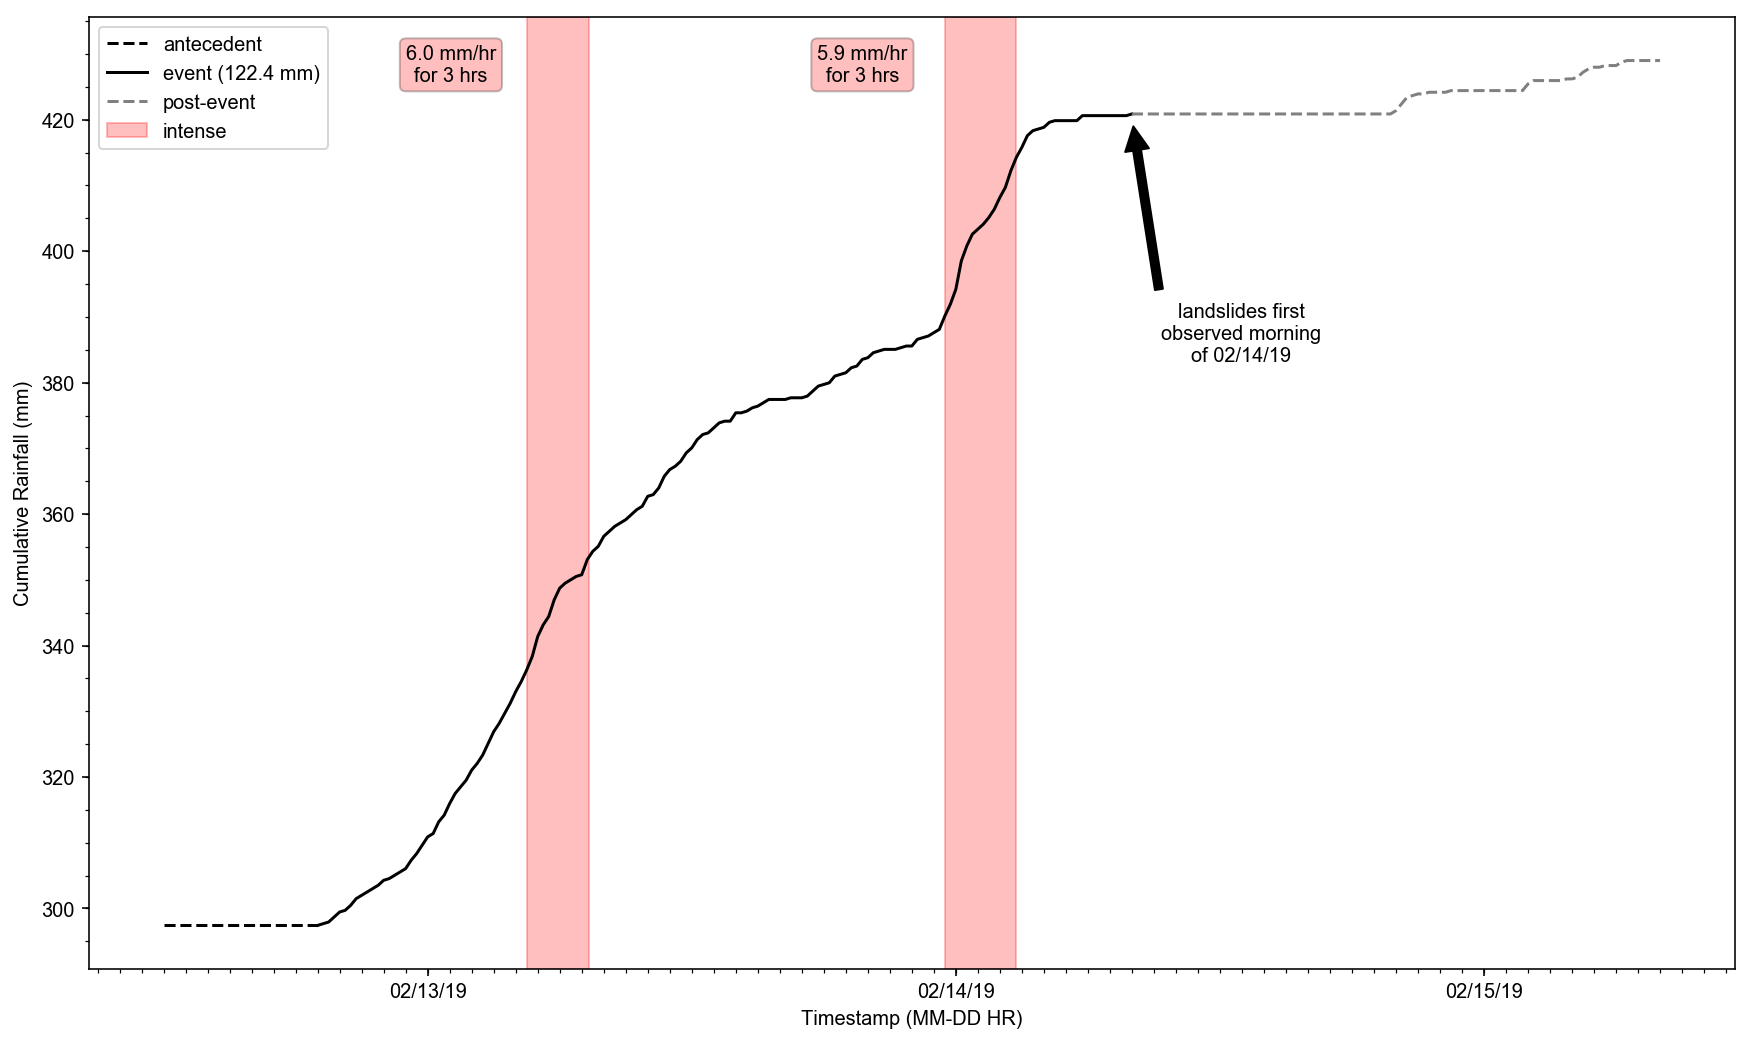

In [8]:
hours = mdates.HourLocator()   # every year

fig2, ax1 = plt.subplots()

ax1.plot(RV_gauge.loc['2019-02-12 12:00:00':'2019-02-12 19:00:00', 'cumulativeRain'], linestyle='--', color='black', label = 'antecedent')
ax1.plot(RV_gauge.loc['2019-02-12 19:00:00':'2019-02-14 08:00:00', 'cumulativeRain'], color='black', label = 'event (122.4 mm)')
ax1.plot(RV_gauge.loc['2019-02-14 08:00:00':'2019-02-15 08:00:00', 'cumulativeRain'], linestyle='--', color='grey', label = 'post-event')

#ax1.plot(RV_gauge.loc['2019-02-13 04:45:00':'2019-02-13 07:30:00', 'cumulativeRain'], color='black', label = '')
#ax1.plot(RV_gauge.loc['2019-02-13 07:30:00':'2019-02-13 23:15:00', 'cumulativeRain'], color='black', label='')
#ax1.plot(RV_gauge.loc['2019-02-13 23:15:00':'2019-02-14 02:30:00', 'cumulativeRain'], color='black', label='')
#ax1.plot(RV_gauge.loc['2019-02-14 02:30:00':'2019-02-14 04:30:00', 'cumulativeRain'], color='black', label='')

ax1.axvspan('2019-02-13 04:30:00', '2019-02-13 07:20:00', alpha=0.25, color='red')
ax1.axvspan('2019-02-13 23:30:00', '2019-02-14 02:45:00', alpha=0.25, color='red', label='intense')

plt.xlabel('Timestamp (MM-DD HR)')
plt.ylabel('Cumulative Rainfall (mm)')

#major ticks
ax1.yaxis.set_major_locator(MultipleLocator(20))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(days_fmt)


#minor ticks
ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(hours)

#an1 = ax1.annotate("event total: 122.4 mm", xy=(0.855, 0.75), xycoords="axes fraction",
#                  va="center", ha="center",
#                  bbox=dict(boxstyle="round", fc="w"))

an2 = ax1.annotate("landslides first\nobserved morning\nof 02/14/19", xy=('02/14/19 08:00:00', 420.4),  xycoords='data',
            xytext=(0.7, 0.7), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top')

an3 = ax1.annotate("5.9 mm/hr\nfor 3 hrs", xy=(0.47, 0.95), xycoords="axes fraction",
                   va="center", ha="center", size=10,
                   bbox=dict(boxstyle="round", fc="r", alpha=0.25))

an4 = ax1.annotate("6.0 mm/hr\nfor 3 hrs", xy=(0.22, 0.95), xycoords="axes fraction",
                   va="center", ha="center", size=10,
                   bbox=dict(boxstyle="round", fc="r", alpha=0.25))

plt.legend()

# twin object for two different y-axis on the sample plot
#ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(slope.loc['2019-02-12 12:00:00':'2019-02-14 12:00:00'], linestyle='--', linewidth=0.5)
#ax2.set_ylabel("Rainfall intensity (mm/hr)",color="blue")

fig2 = plt.gcf()
fig2.set_size_inches(14.75, 8.75)
fig2.savefig('figures/rainfall_intesity.pdf', bbox_inches='tight')

# compare to 2019 year 2017 year

In [16]:
prism_17 = pd.read_csv('2017wateryear_prism.csv')
prism_17.head(3)

,Date,ppt (mm)
0,10/1/2016,0.0
1,10/2/2016,0.0
2,10/3/2016,0.0


In [17]:
prism_19 = pd.read_csv('2019wateryear_prism.csv')
prism_19.head(3)

,Date,ppt (mm)
0,10/1/2018,0.00
1,10/2/2018,0.00
2,10/3/2018,3.13


In [18]:
prism_17['Date'] =  pd.to_datetime(prism_17['Date'])
prism_17.head(3)

,Date,ppt (mm)
0,2016-10-01,0.0
1,2016-10-02,0.0
2,2016-10-03,0.0


In [19]:
prism_19['Date'] =  pd.to_datetime(prism_19['Date'])
prism_19.head(3)

,Date,ppt (mm)
0,2018-10-01,0.00
1,2018-10-02,0.00
2,2018-10-03,3.13


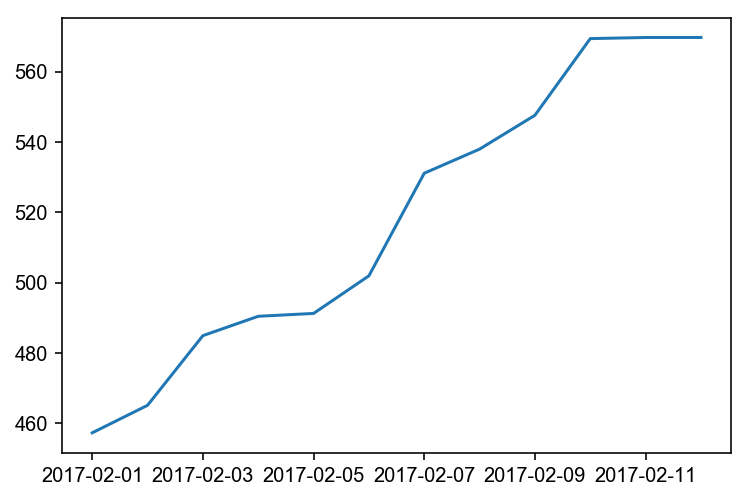

In [20]:
fig3, axCS = plt.subplots()

prism_17 = prism_17.set_index('Date')
sum_prism_17 = prism_17.cumsum()

prism_19 = prism_19.set_index('Date')
sum_prism_19 = prism_19.cumsum()

axCS.plot(sum_prism_17.loc['2017-02-01':'2017-2-12'])

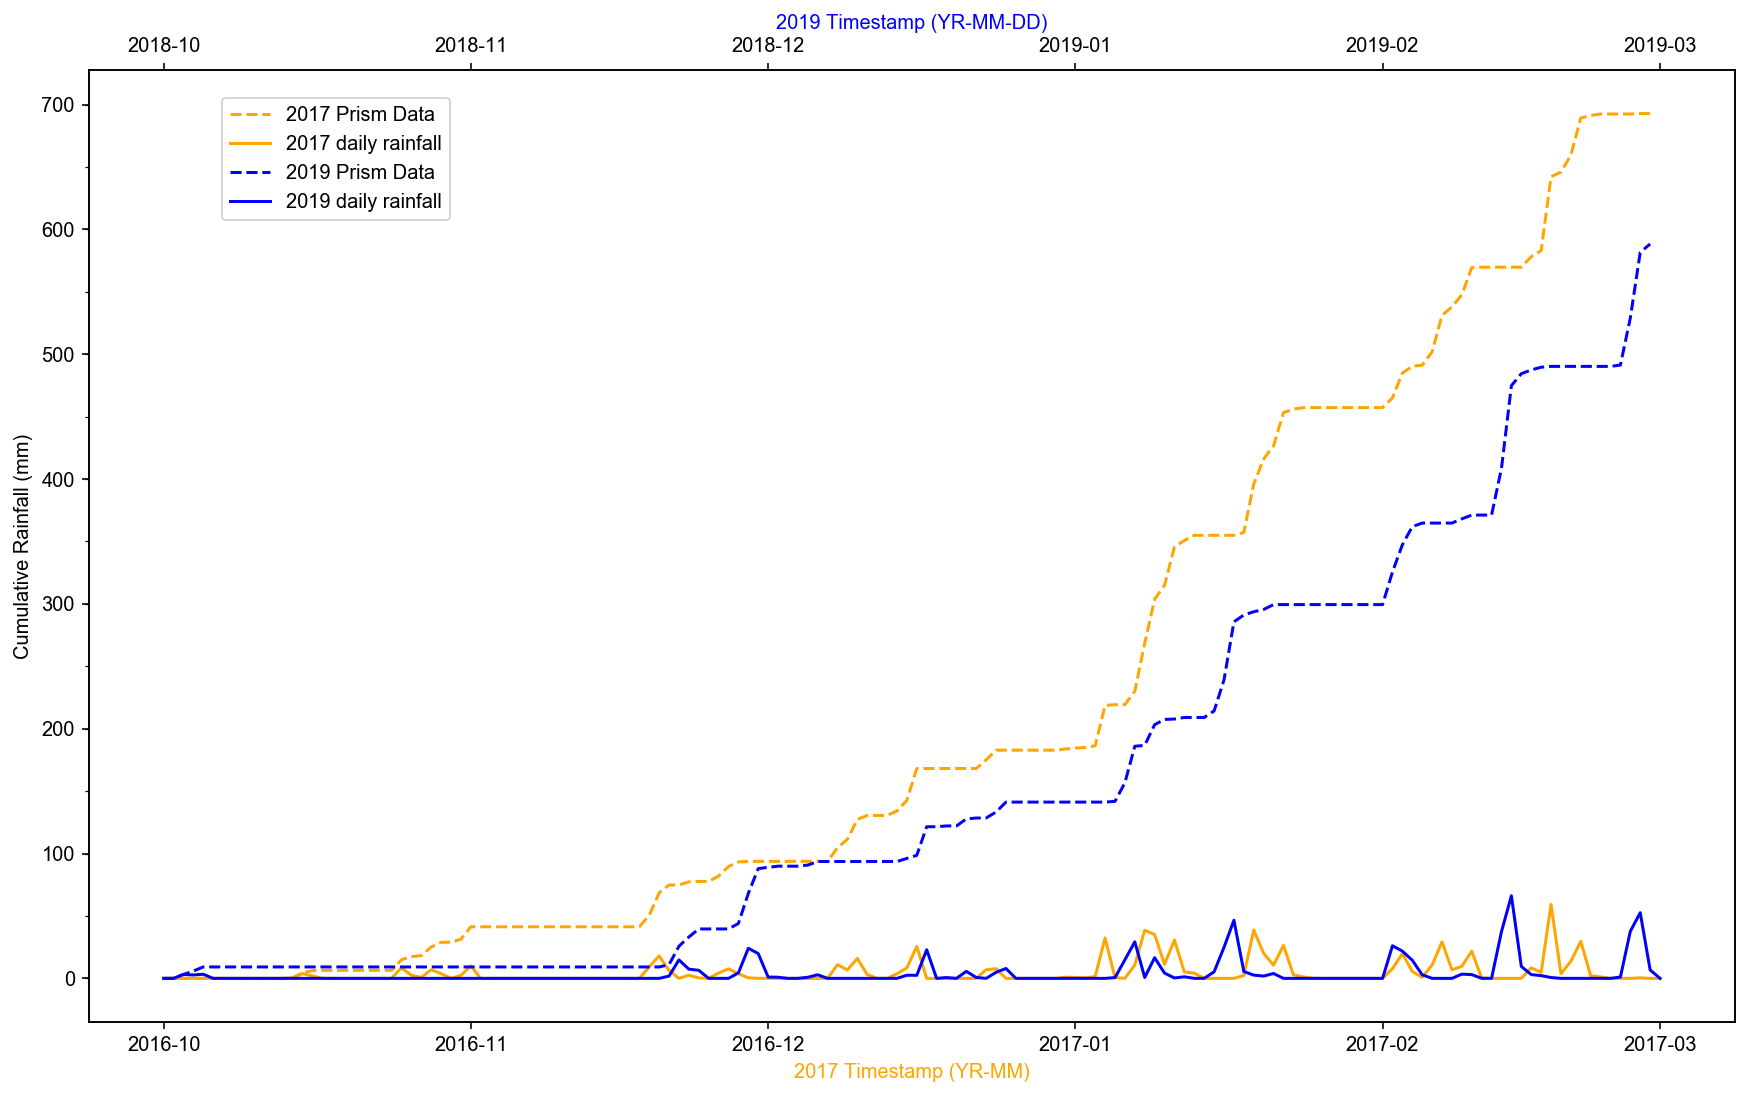

In [28]:
month = mdates.MonthLocator()   # every year
month_fmt = mdates.DateFormatter('%Y-%m')

fig4 = plt.figure()
ax17 = fig4.add_subplot(111)
ax19 = ax17.twiny()

#2017 data
ax17.plot(sum_prism_17.loc['2016-10-01':'2017-02-28', 'ppt (mm)'], linestyle='--', color='orange', label = '2017 Prism Data')

ax17.set_xlabel('2017 Timestamp (YR-MM)', color='orange')
ax19.set_xlabel('2019 Timestamp (YR-MM-DD)',color="blue")

ax17.set_ylabel('Cumulative Rainfall (mm)')

#y-axis ticks
ax17.yaxis.set_major_locator(MultipleLocator(100))
ax17.yaxis.set_major_formatter(FormatStrFormatter('%d'))

ax17.yaxis.set_minor_locator(MultipleLocator(50))

#x-axis ticks
#ax17.set_xlim('2016-12','2017-03')
#ax19.set_xlim('2018-12','2019-03')

#ax17.xaxis.set_major_locator(month)
#ax17.xaxis.set_major_formatter(month_fmt)


# 2019 data
ax19.plot(sum_prism_19.loc['2018-10-01':'2019-02-28', 'ppt (mm)'], linestyle='--', color='blue', label = '2019 Prism Data')
#axJ.plot(RV_gauge.loc['2019-02-12 19:00:00':'2019-02-14 04:30:00', 'cumulativeRain'], color='blue', label = 'event (122.4 mm)')
#axJ.plot(RV_gauge.loc['2019-02-14 04:30:00':'2019-02-14 12:00:00', 'cumulativeRain'], linestyle='--', color='grey', label = 'post-event')


ax17.plot(prism_17.loc['2016-10-01':'2017-03-01'], color='orange', label='2017 daily rainfall')
ax19.plot(prism_19.loc['2018-10-01':'2019-03-01'], color='blue', label='2019 daily rainfall')


#ax17.axvspan('2017-02-16 6:00:00', '2017-02-21 12:00:00', alpha=0.1, color='orange', label='2017 Event')
#ax19.axvspan('2019-02-12 19:00:00', '2019-02-14 04:30:00', alpha=0.1, color='blue', label='2019 Event')

fig4.legend(bbox_to_anchor=(0.1, 0.80), loc='upper left')

fig4 = plt.gcf()
fig4.set_size_inches(14.75, 8.75)
#fig4.savefig('figures/yr_rainfall_comparison.pdf', bbox_inches='tight')

# RhondaGregCorrectedRainfall2017 vs MHRainfall2019

In [16]:
rain2017 = pd.read_csv('RhondaGregCorrectedRainfall-2019-02-27.csv')
rain2017.head()

,Timestamp,Outdoor Temperature,Outdoor Humidity,Dew Point,Heat Index,Wind Chill,Barometric Pressure,Rain,Wind Speed,Wind Average,Peak Wind,Wind Direction,Indoor Temperature,Indoor Humidity,RainCorrected,RainDiff,RainCorrected_mm,RainCorrected_mm_per_15min,PreEvent_CumSum_mm
0,1/18/2017 16:00,47.3,90.0,45.0,47.0,41.0,29.23,7.19,15.530,15.5,30.45,180.0,60.2,51.0,6.2553,NaN,158.88462,NaN,NaN
1,1/18/2017 16:15,47.3,90.0,45.0,47.0,42.0,29.23,7.21,12.430,16.2,30.45,180.0,60.2,51.0,6.2727,0.020,159.32658,0.44196,NaN
2,1/18/2017 16:30,47.5,89.5,45.0,48.0,41.5,29.22,7.22,18.955,18.3,30.45,180.0,60.1,51.5,6.2814,0.005,159.54756,0.22098,NaN
3,1/18/2017 16:45,47.5,90.0,45.0,48.0,41.0,29.21,7.23,19.260,16.8,30.45,180.0,60.4,53.0,6.2901,0.010,159.76854,0.22098,NaN
4,1/18/2017 17:00,47.5,90.0,45.0,48.0,43.0,29.21,7.23,11.180,14.3,28.58,180.0,60.6,53.0,6.2901,0.000,159.76854,0.00000,NaN


In [17]:
rain2017['Timestamp'] =  pd.to_datetime(rain2017['Timestamp'])
rain2017.head(3)

,Timestamp,Outdoor Temperature,Outdoor Humidity,Dew Point,Heat Index,Wind Chill,Barometric Pressure,Rain,Wind Speed,Wind Average,Peak Wind,Wind Direction,Indoor Temperature,Indoor Humidity,RainCorrected,RainDiff,RainCorrected_mm,RainCorrected_mm_per_15min,PreEvent_CumSum_mm
0,2017-01-18 16:00:00,47.3,90.0,45.0,47.0,41.0,29.23,7.19,15.530,15.5,30.45,180.0,60.2,51.0,6.2553,NaN,158.88462,NaN,NaN
1,2017-01-18 16:15:00,47.3,90.0,45.0,47.0,42.0,29.23,7.21,12.430,16.2,30.45,180.0,60.2,51.0,6.2727,0.020,159.32658,0.44196,NaN
2,2017-01-18 16:30:00,47.5,89.5,45.0,48.0,41.5,29.22,7.22,18.955,18.3,30.45,180.0,60.1,51.5,6.2814,0.005,159.54756,0.22098,NaN


In [18]:
rain2017 = rain2017.set_index('Timestamp')

In [19]:
slope2017 = rain2017['RainCorrected_mm_per_15min'] / 0.25 # mm/hr slope
slope

datetime
2018-10-01 00:00:00    0.000
2018-10-01 00:15:00    0.000
2018-10-01 00:30:00    0.000
2018-10-01 00:45:00    0.000
2018-10-01 01:00:00    0.000
                       ...  
2019-02-27 08:00:00    0.000
2019-02-27 08:15:00    0.000
2019-02-27 08:30:00    1.016
2019-02-27 08:45:00    0.000
2019-02-27 09:00:00    1.016
Name: RainFall, Length: 14341, dtype: float64

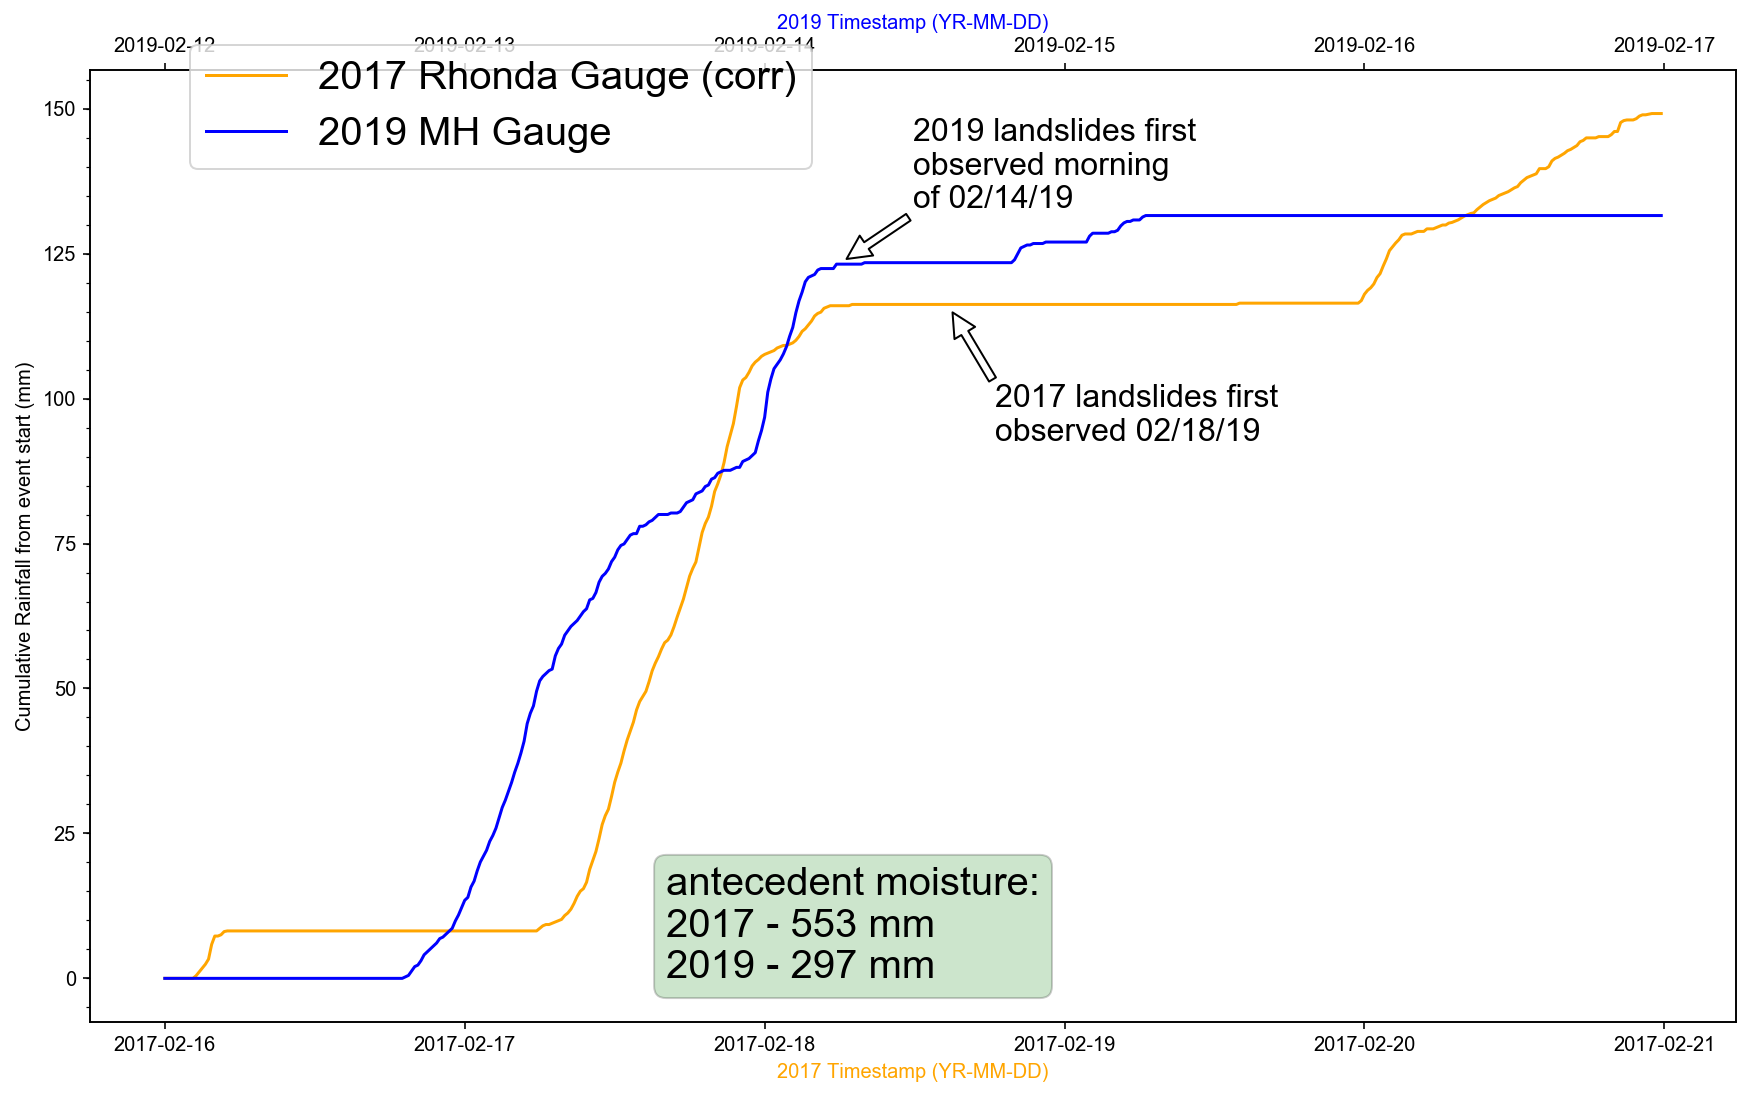

In [20]:
fig5 = plt.figure()
ax7 = fig5.add_subplot(111)
ax9 = ax7.twiny()

#2017 data
ax7.plot(rain2017.loc['2017-02-16 00:00:00':'2017-02-20 23:45:00', 'PreEvent_CumSum_mm']-16.79, color='orange', label = '2017 Rhonda Gauge (corr)')
#2019data
ax9.plot(RV_gauge.loc['2019-02-12 00:00:00':'2019-02-16 23:45:00', 'PreEvent_CumSum_mm']-66.04, color='blue', label = '2019 MH Gauge')

an = ax7.annotate("antecedent moisture:\n2017 - 553 mm\n2019 - 297 mm",
                  xy=(0.35, 0.1), xycoords="axes fraction",
                  va="center", ha="left", fontsize=20,
                  bbox=dict(boxstyle="round", fc="g", alpha=0.2))

an2 = ax9.annotate("2019 landslides first\nobserved morning\nof 02/14/19", xy=('02/14/19 06:30:00', 124),  xycoords='data',
            xytext=(0.5, 0.95), textcoords='axes fraction', fontsize=16,
            arrowprops=dict(facecolor='white',edgecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top')

an3 = ax7.annotate("2017 landslides first\nobserved 02/18/19", xy=('02/18/17 15:00:00', 115),  xycoords='data',
            xytext=(0.55, 0.67), textcoords='axes fraction', fontsize=16,
            arrowprops=dict(facecolor='white',edgecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top')

ax7.set_ylabel('Cumulative Rainfall from event start (mm)')
ax7.set_xlabel('2017 Timestamp (YR-MM-DD)',color="orange")

ax9.set_xlabel('2019 Timestamp (YR-MM-DD)', color='blue')

#y-axis ticks
ax7.yaxis.set_major_locator(MultipleLocator(25))
ax7.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax7.yaxis.set_minor_locator(MultipleLocator(5))

fig5.legend(bbox_to_anchor=(0.08, 0.85), loc='upper left', fontsize=20)

fig5 = plt.gcf()
fig5.set_size_inches(14.75, 8.75)
fig5.savefig('figures/event_comparison.pdf', bbox_inches='tight')

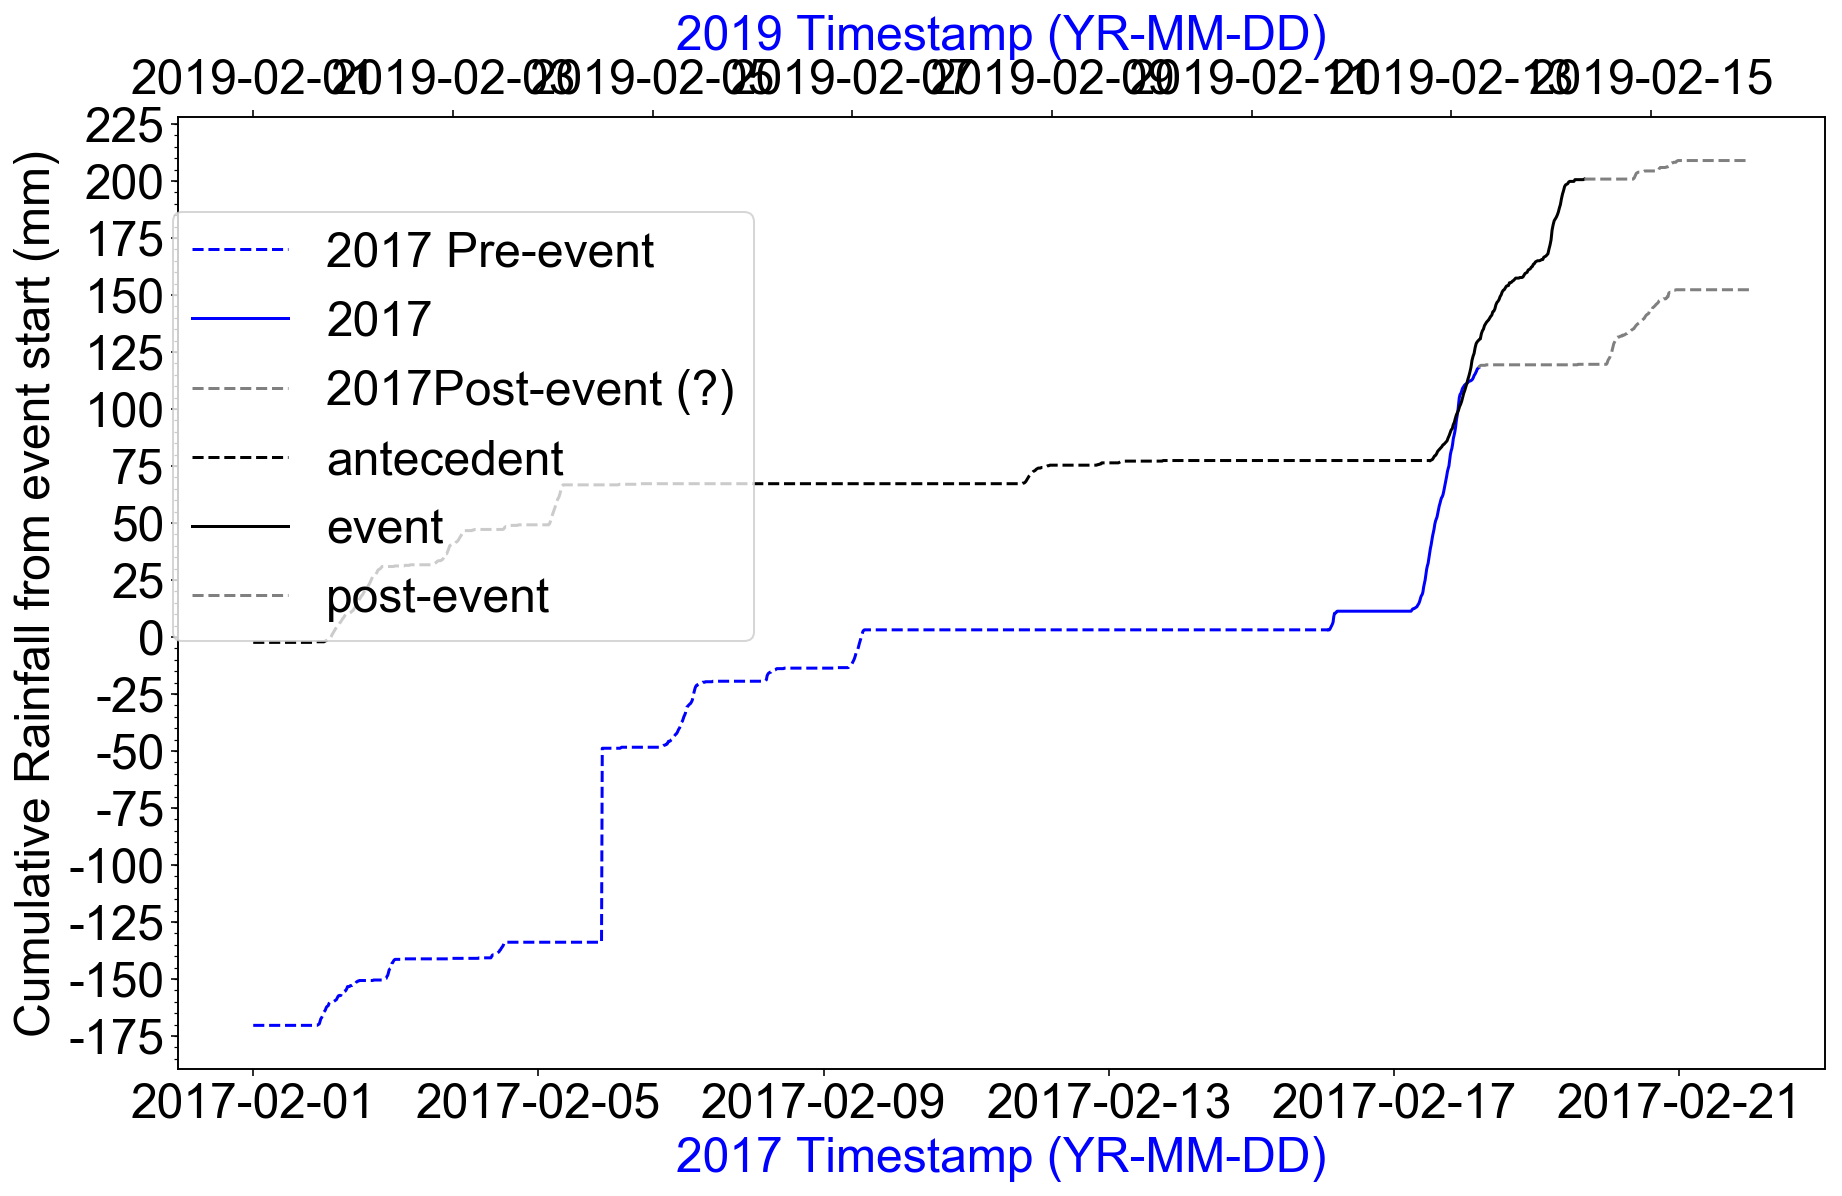

In [45]:
fig6 = plt.figure()
ax2017 = fig6.add_subplot(111)
#ax2017S = ax2017.twinx()
ax2019 = ax2017.twiny()

#2017 data
ax2017.plot(rain2017.loc['2017-02-01 00:00:00':'2017-02-16 02:00:00', 'RainCorrected_mm']-380, color='blue', linestyle='--', label = '2017 Pre-event')
ax2017.plot(rain2017.loc['2017-02-16 02:00:00':'2017-02-18 04:30:00', 'RainCorrected_mm']-380, color='blue', label = '2017')
ax2017.plot(rain2017.loc['2017-02-18 04:30:00':'2017-02-21 23:45:00', 'RainCorrected_mm']-380, color='grey', linestyle='--', label = '2017Post-event (?)')
ax2019.plot(RV_gauge.loc['2019-02-01 00:00:00':'2019-02-12 19:00:00', 'cumulativeRain']-220, linestyle='--', color='black', label = 'antecedent')
ax2019.plot(RV_gauge.loc['2019-02-12 19:00:00':'2019-02-14 08:00:00', 'cumulativeRain']-220, color='black', label = 'event')
ax2019.plot(RV_gauge.loc['2019-02-14 08:00:00':'2019-02-15 23:59:00', 'cumulativeRain']-220, linestyle='--', color='grey', label = 'post-event')

#ax2017.axvspan('2017-02-17 09:30:00', '2017-02-17 22:30:00', alpha=0.25, color='blue', label = "intense")

ax2017.set_ylabel('Cumulative Rainfall from event start (mm)')
ax2017.set_xlabel('2017 Timestamp (YR-MM-DD)',color="blue")

ax2019.set_xlabel('2019 Timestamp (YR-MM-DD)',color="blue")

#y-axis ticks
ax2017.yaxis.set_major_locator(MultipleLocator(25))
ax2017.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax2017.yaxis.set_minor_locator(MultipleLocator(5))

#ax2017S.set_ylim(-1,18)
#ax2017S.set_ylabel('Hourly Intensity (mm/hr)')
#ax2017S.yaxis.set_major_locator(MultipleLocator(25))
#ax2017S.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax2017S.yaxis.set_minor_locator(MultipleLocator(5))

#an = ax2017S.annotate("6.0 mm/hr\nfor 13 hrs", xy=(0.3, 0.95), xycoords="axes fraction",
#                   va="center", ha="center", size=10,
#                   bbox=dict(boxstyle="round", fc="b", alpha=0.25))

#ax2017S.plot(slope2017.loc['2017-02-16 00:00:00':'2017-02-20 23:45:00'], color='blue', alpha=0.25, linewidth=0.5, label='2017 hourly intensity (mm/hr)')

fig6.legend(bbox_to_anchor=(0.07, 0.80), loc='upper left')

fig6 = plt.gcf()
fig6.set_size_inches(14.75, 8.75)
fig6.savefig('figures/2017_event.pdf', bbox_inches='tight')


### scraps

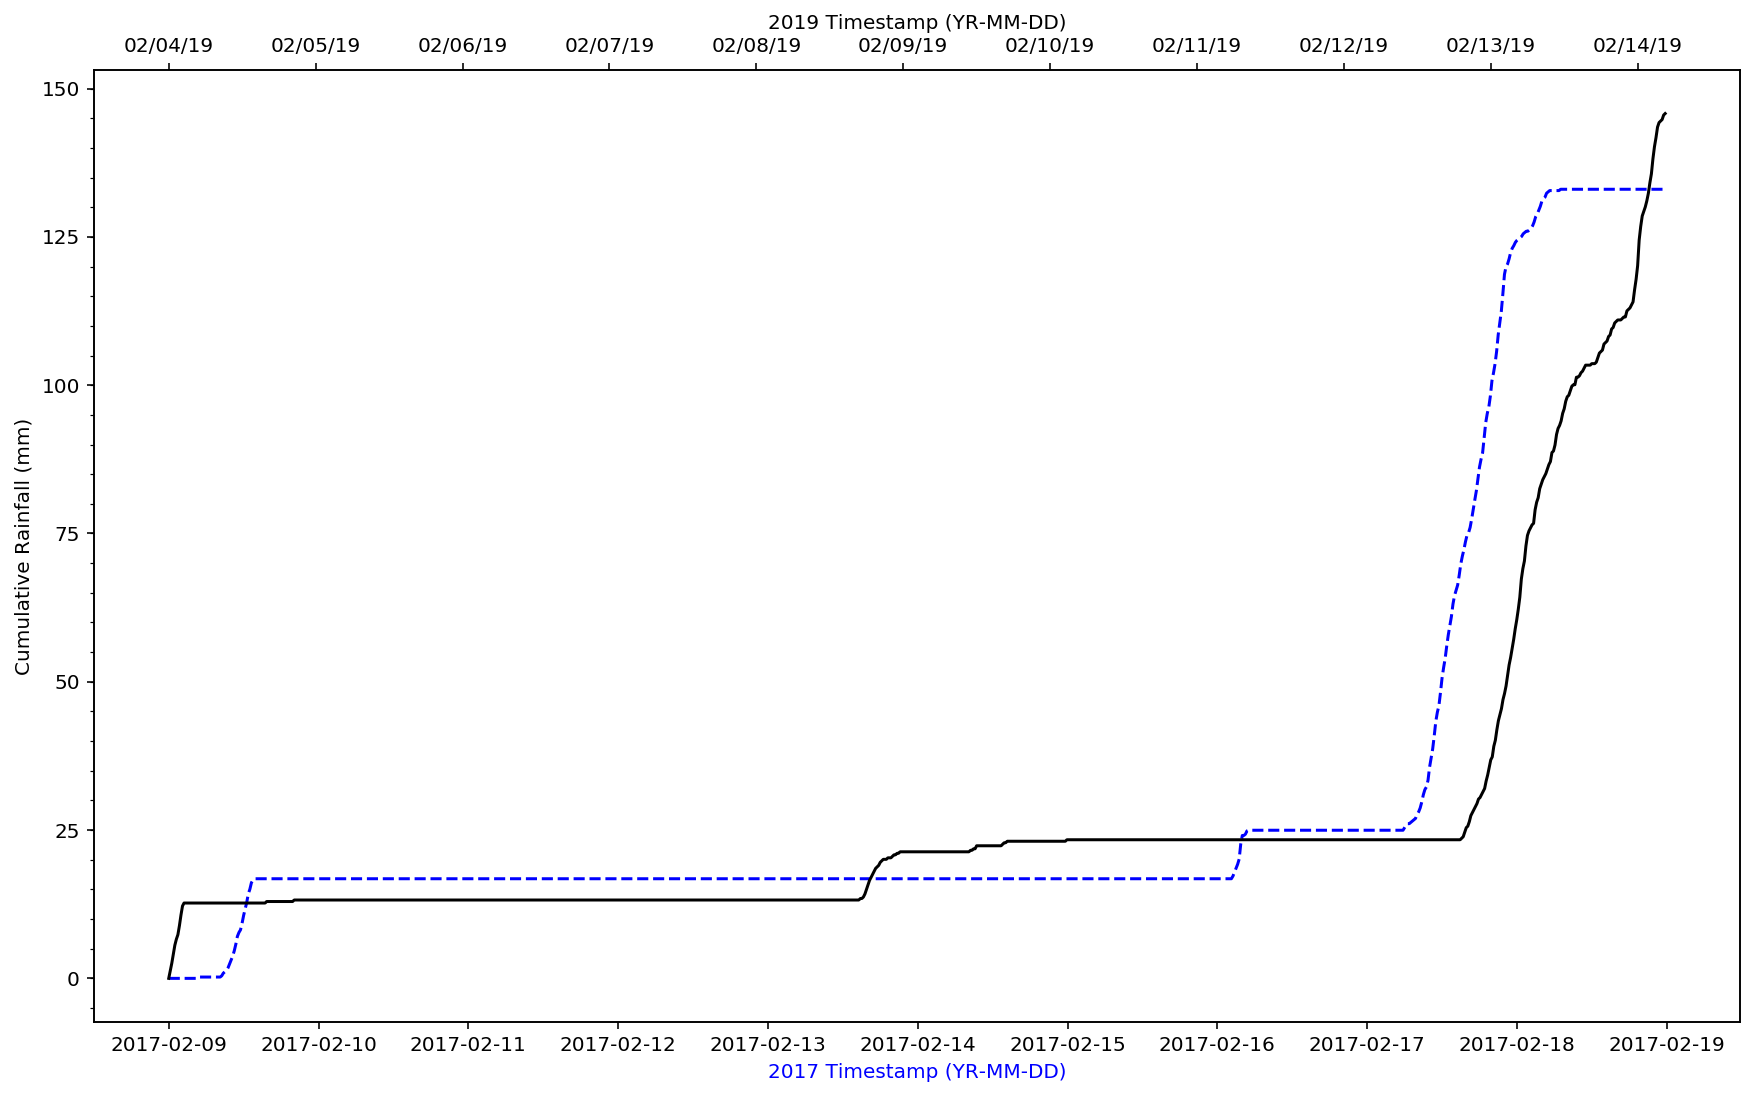

In [62]:
fig=plt.figure()
ax7 = fig.add_subplot(111)
ax9 = ax7.twiny()

#2017 data
ax7.plot(rain2017.loc['2017-02-09 00:00:00':'2017-02-18 23:45:00', 'PreEvent_CumSum_mm'], linestyle='--', color='blue', label = 'antecedent')
#2019data
ax9.plot(RV_gauge.loc['2019-02-04 00:00:00':'2019-02-14 04:30:00', 'PreEvent_CumSum_mm']-42.672, color='black', label = 'event (122.4 mm)')

ax7.set_ylabel('Cumulative Rainfall (mm)')
ax7.set_xlabel('2017 Timestamp (YR-MM-DD)',color="blue")

ax9.set_xlabel('2019 Timestamp (YR-MM-DD)')

#y-axis ticks
ax7.yaxis.set_major_locator(MultipleLocator(25))
ax7.yaxis.set_major_formatter(FormatStrFormatter('%d'))

ax7.yaxis.set_minor_locator(MultipleLocator(5))

ax9.xaxis.set_major_locator(days)
ax9.xaxis.set_major_formatter(days_fmt)

ax9.xaxis.tick_top()
ax9.yaxis.tick_right()
ax9.xaxis.set_label_position('top') 

ax9.tick_params(axis='x')
#ax9.tick_params(axis='y')

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#fig.savefig('figures/rainfall_comparison.pdf', bbox_inches='tight')

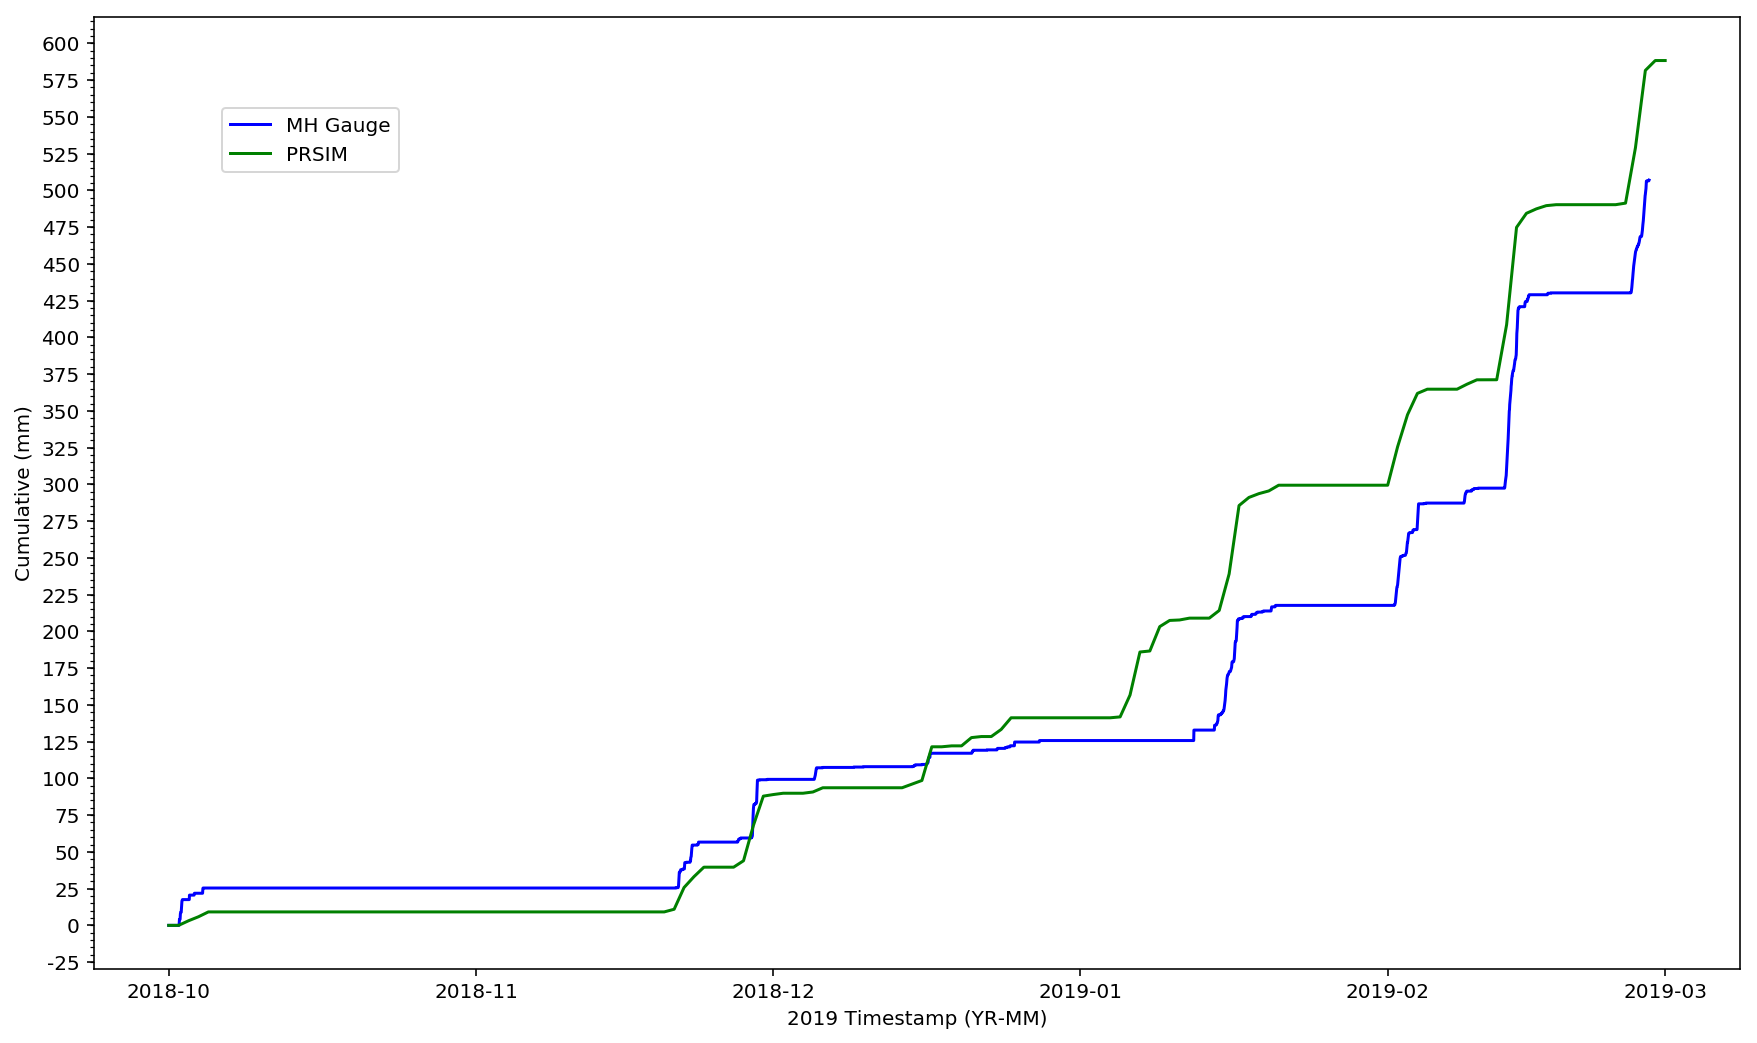

In [181]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax2017S = ax2017.twinx()

#2017 data
ax.plot(RV_gauge.loc['2018-10-01 00:00:00':'2019-03-01 23:45:00', 'cumulativeRain'], color='blue', label = 'MH Gauge')
ax.plot(sum_prism_19.loc['2018-10-01 00:00:00':'2019-03-01 23:45:00', 'ppt (mm)'], color='green', label = 'PRSIM')

ax.set_ylabel('Cumulative (mm)')
ax.set_xlabel('2019 Timestamp (YR-MM)')

#y-axis ticks
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(5))

#ax2017S.set_ylim(-1,18)
#ax2017S.set_ylabel('Hourly Intensity (mm/hr)')
#ax2017S.yaxis.set_major_locator(MultipleLocator(25))
#ax2017S.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax2017S.yaxis.set_minor_locator(MultipleLocator(5))

#ax2017S.plot(slope2017.loc['2017-02-16 00:00:00':'2017-02-20 23:45:00'], color='blue', alpha=0.25, linewidth=0.5, label='2017 hourly intensity (mm/hr)')

fig.legend(bbox_to_anchor=(0.1, 0.750), loc='upper left')

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
fig.savefig('figures/data_comparison.pdf', bbox_inches='tight')

# hads data

In [30]:
hads_2017 = pd.read_csv('hads_2017.csv')
hads_2017.head(3)

,Unnamed: 0,CLSC1,CLFC1,EPRC1,CLRC1,CSAC1,EPRC1_cumsum
0,2016-10-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-10-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-10-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
hads_2019 = pd.read_csv('hads_2019.csv')
hads_2019.head(3)

,datetime,CLSC1,CLFC1,EPRC1,CLRC1,CSAC1,EPRC1_cumsum
0,2018-10-01 00:00:00+00:00,0.0,0.0,0.0,0,0.0,NaN
1,2018-10-01 01:00:00+00:00,0.0,0.0,0.0,0,0.0,0.0
2,2018-10-01 02:00:00+00:00,0.0,0.0,0.0,0,0.0,0.0


In [32]:
hads_2017['Unnamed: 0'] =  pd.to_datetime(hads_2017['Unnamed: 0'])
hads_2017.dtypes

Unnamed: 0      datetime64[ns, UTC]
CLSC1                       float64
CLFC1                       float64
EPRC1                       float64
CLRC1                       float64
CSAC1                       float64
EPRC1_cumsum                float64
dtype: object

In [33]:
hads_2017 = hads_2017.set_index('Unnamed: 0')

In [34]:
hads_2019['datetime'] =  pd.to_datetime(hads_2019['datetime'])
hads_2019.dtypes

datetime        datetime64[ns, UTC]
CLSC1                       float64
CLFC1                       float64
EPRC1                       float64
CLRC1                         int64
CSAC1                       float64
EPRC1_cumsum                float64
dtype: object

In [35]:
hads_2019 = hads_2019.set_index('datetime')

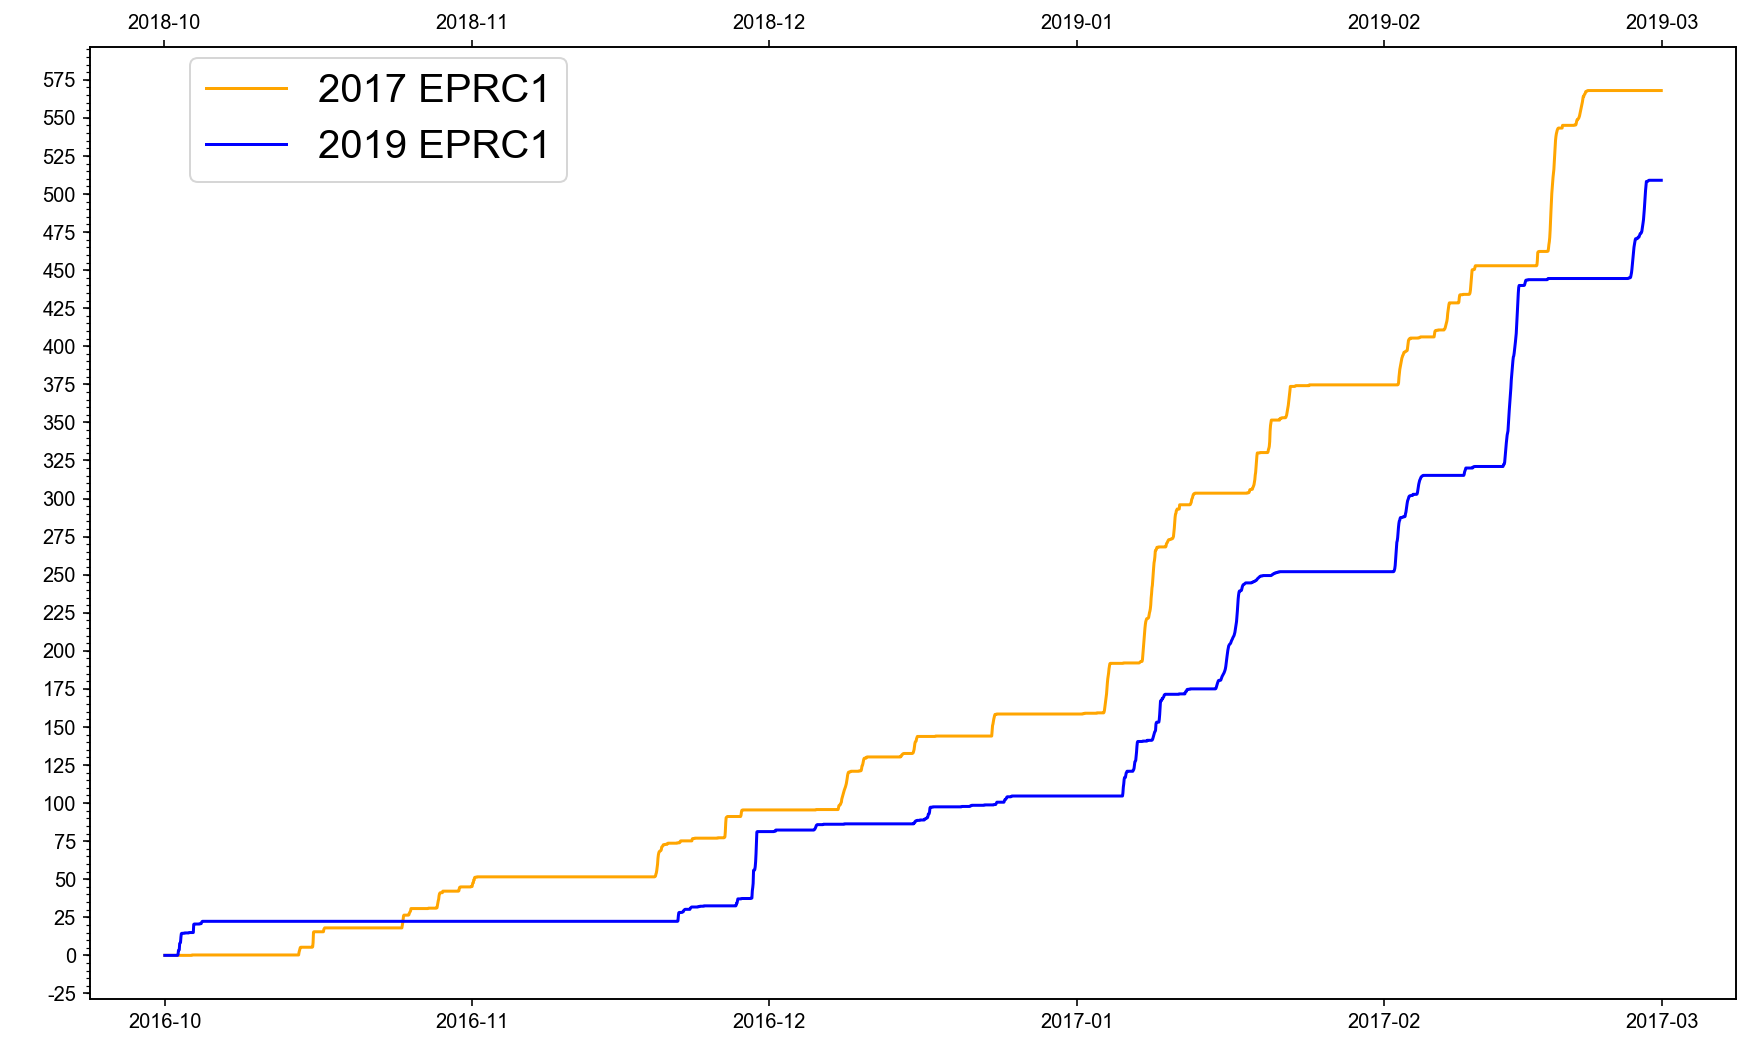

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twiny()

#2017 data
ax.plot(hads_2017.loc['2016-10-01 00:00:00':'2017-02-28 23:45:00', 'EPRC1_cumsum'], color='orange', label = '2017 EPRC1')

#2019 data
ax2.plot(hads_2019.loc['2018-10-01 00:00:00':'2019-02-28 23:45:00', 'EPRC1_cumsum'], color='blue', label = '2019 EPRC1')

ax.yaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(5))

fig.legend(bbox_to_anchor=(0.08, 0.8), loc='upper left', fontsize=20)

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#fig.savefig('figures/event_comparison.pdf', bbox_inches='tight')

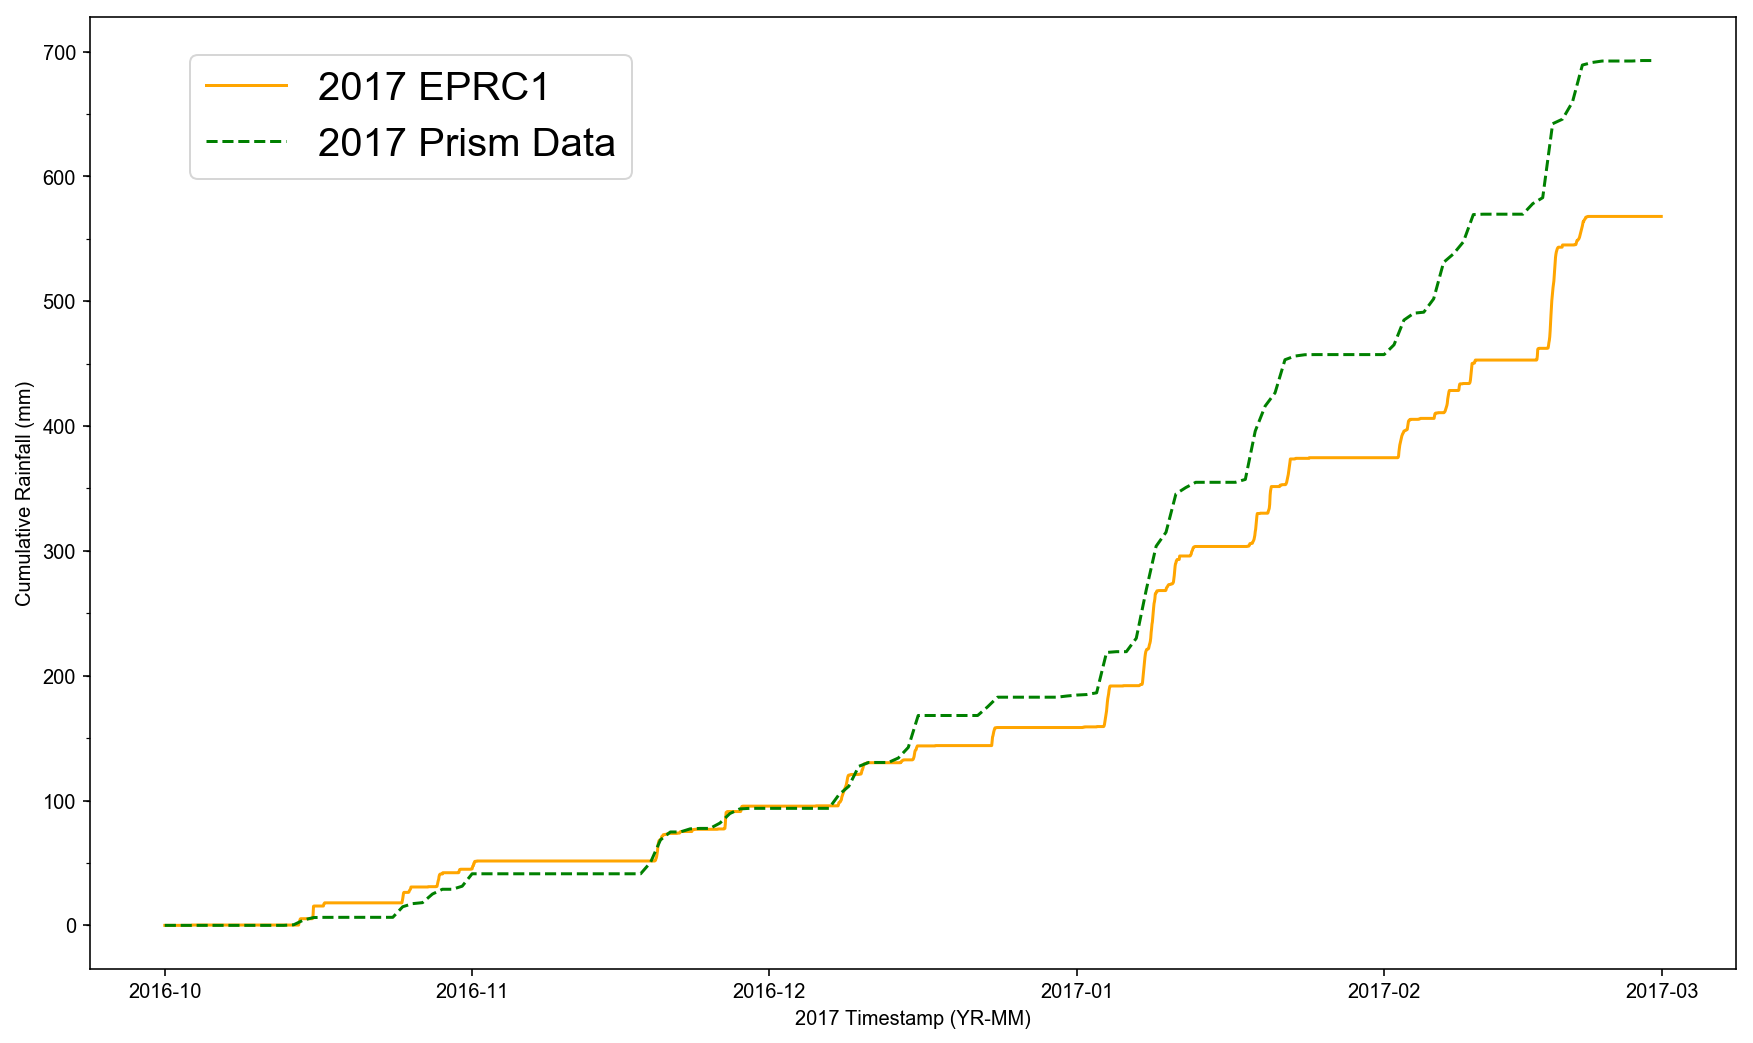

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

#2017 hads data
ax.plot(hads_2017.loc['2016-10-01 00:00:00':'2017-02-28 23:45:00', 'EPRC1_cumsum'], color='orange', label = '2017 EPRC1')

#2017 prism data
ax.plot(sum_prism_17.loc['2016-10-01':'2017-02-28', 'ppt (mm)'], linestyle='--', color='green', label = '2017 Prism Data')


ax.set_xlabel('2017 Timestamp (YR-MM)')
ax.set_ylabel('Cumulative Rainfall (mm)')

#y-axis ticks
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(50))

#x-axis ticks
#ax17.set_xlim('2016-12','2017-03')
#ax19.set_xlim('2018-12','2019-03')

#ax17.xaxis.set_major_locator(month)
#ax17.xaxis.set_major_formatter(month_fmt)

fig.legend(bbox_to_anchor=(0.08, 0.8), loc='upper left', fontsize=20)

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#fig.savefig('figures/event_comparison.pdf', bbox_inches='tight')